# Statistics -- some basic concepts








## Characterizing Data
Two basic kinds of data:
* qualitative
  * categories, colors, emotions, preferences, popularity
  * polls, medical studies, market research 
  * *difficult to treat with mathematical methods*
* quantitative
  * numerical values -- std case in physics/science, we will focus on that
    * can be discrete -- number of tracks in collission, number of persons in car, number of heads when tossing coins, ...
    * or continuous -- mass of particle, size of person, intensity of source, velocity of object, ...
    


### Visualisation example
Frequency-distribution:
* 1 or more quantities are repeatedly measured 
* fill quantity in **histogram**
  * divide range *(xmin, xmax)* into *nbins* intervals
  * each observation is filled into histogram
    * interval content incremented by 1
    
Simple example:
* fill measured wire position into histogram


If normalized : 
$ \frac {N_{bin}} {N_{tot}}$

it can be interpreted as probabily density


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

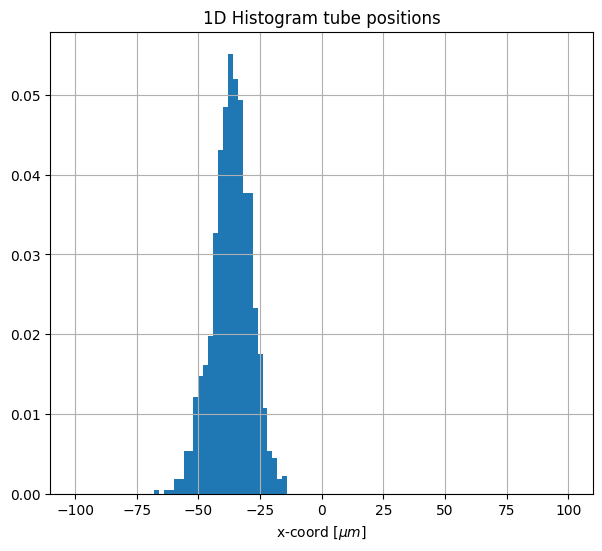

In [2]:
data = np.loadtxt('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python/nb/data/rohr1.dat')
fig = plt.figure(1, figsize=(7,6))  # get handle to matplotlib figure and specify size
#plt.hist(data) # automatic determination of range and bins
plt.hist(data,bins=100, range=(-100,100),density=1) # specify range and bins and density flag
plt.xlabel('x-coord [$\mu m$]') # x-axis
plt.title('1D Histogram tube positions') # title header
plt.grid(True)

##### Can be extended to 2-D (and more...) 

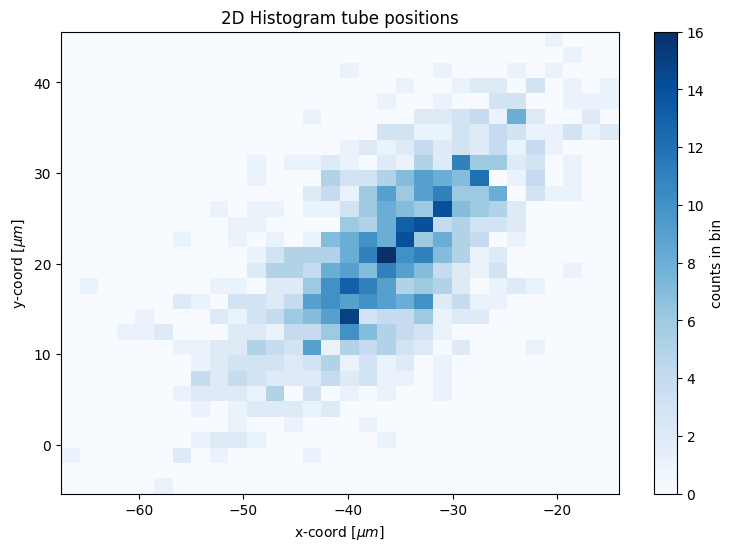

In [3]:
data2 = np.loadtxt('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python/nb/data/rohr2.dat')
fig = plt.figure(1, figsize=(9,6))  # get handle to matplotlib figure and specify size
plt.hist2d(data2[:,0],data2[:,1], bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')
plt.xlabel('x-coord [$\mu m$]') # x-axis
plt.ylabel('y-coord [$\mu m$]') # x-axis
plt.title('2D Histogram tube positions'); # title header


### Characterizing data contd

#### Mean value:
Most common way to describe a dataset ${(x_1, x_2, ... , x_N)}$ with a single value is the **arithmetic mean**:

$$\bar{x} = \frac{\sum_{i=1}^{N} x_i}{N}$$

Useful for many cases, but there are more alternatives:

**Geometric mean**: $$ \sqrt[N]{x_1 \cdot x_2 \cdot ... \cdot x_N}$$

**Harmonic mean**: $$ \left( \frac{N}{1/x_1 + 1/x_2 + ... + 1/x_N}\right)^{-1} $$

**Median**: 
* the value in the middle, i.e. half of the values are smaller, the other half is larger
* very useful for datasets were the underlying distibution is not known or has large tails

A simple way to get it is sorting the dataset and then take the value in the middle:
$$ Median = x_{N/2} $$


#### Width
Besides the mean the 2nd important quantity to characterize data 

Most common is the **variance**:
    $$V(x) = \frac{\sum (x_i - \bar{x})^2}{N} = \frac{\sum x_i^2}{N} - \bar{x}^2$$
    
or the **standard-deviation**:
 $$\sigma(x) = \sqrt{V(x)} = \sqrt{ \frac{\sum (x_i - \bar{x})^2}{N}} = \sqrt{\frac{\sum x_i^2}{N} - \bar{x}^2 }$$
 
 Further option would be:
  $$ \frac{\sum |x_i - \bar{x}|}{N} $$

*not very common, ugly mathematical properties ...*


More practical are so-called **Quantiles**:
* lower Quartil: 25% of values are lower 
* upper Quartil: 75% of values are lower 
* take **width** as difference between upper and lower Quartile.
* or more general take arbitrary **Percentile**: XX% Percentile = XX% of values are smaller.

In [4]:
# example with numpy
mydata=np.random.normal(10.,2.,10000) # Gaussian distributed random numbers, mean=10, std=2

# mean and std are directly available as methods for mumpy array
print(f"Mean={mydata.mean():.3f}, Std={mydata.std():.3f} ")

# median and quantile are general numpy methods
print(f"Median={np.median(mydata):.3f}")
# quantile takes list of desired percentiles as input parameter and returns corresponding list
mydq = np.quantile(mydata,(0.05,0.25,0.5,0.75,0.95)) 
print(mydq)

Mean=10.000, Std=1.996 
Median=10.001
[ 6.71191373  8.67779133 10.00148225 11.33627267 13.29683785]


In [5]:
width = float(np.quantile(mydata, 0.75)) - float(np.quantile(mydata, 0.25))
print(f"width={width:.3f}")

width=2.658


#### Higher powers

An obvious extension to arithmetic mean and variance are higher powers:

$$ \text{Skew} = \frac{\sum (x_i - \bar{x})^3}{N \sigma^3}$$

*(Factor $1/\sigma^3$ makes Skew dimensionless)*

Skew ist useful to characterise asymmetries, it is positive in case of tails to high values (and v.v.), it is ~0 for symmetric distributions.




In [6]:
# skew function in scipy.stats
from scipy.stats import skew
skew(mydata)

-0.019409024419254912

#### Example for skewed distribution
Sales-price of houses, see
https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_ames_housing.html 

skew = 1.880940746034036


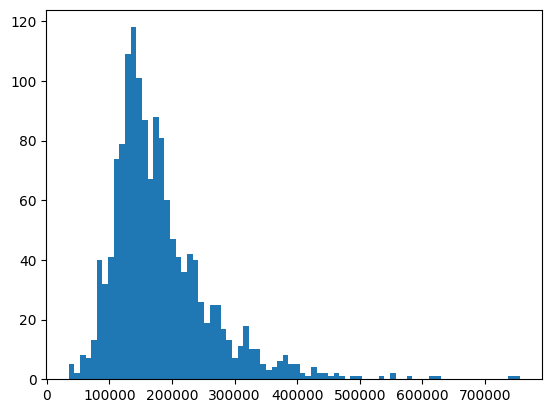

In [7]:
# use housing dataset
import pandas as pd
df = pd.read_csv( 'http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python/nb/data/ames_housing_no_missing.csv')
sp=df.SalePrice.to_numpy()
plt.hist(sp,bins=80);
print(f"skew = {skew(sp)}")

---

### Multiple variables
Often one records simultaneously several quantities per "Event"
* x,y,z-coordinates
* weight and height 
* exam results in different fields

Besides mean and variance of the individual quantities it is important to quantify also dependencies between variables. Similar to **variance** one can define **covariance**: 
$$cov(x,y) = \frac{1}{N} \sum (x_i - \overline{x}) \cdot (y_i - \overline{y}) = 
\overline{xy} - \overline{x} \cdot \overline{y}$$

* In case high (low) values of $x$ often occur with high (low) values of $y$ then the 
covariance is positive
* the other way round: covariance is negative
* in case of independent quantities the covariance is close to zero.


A better measure to quantify the dependency is the **correlation**  
$$ \rho \equiv \frac{cov(x,y)}{\sigma(x) \sigma(y)}$$
with $ -1 \le \rho \le 1$.

$\rho = \pm 1 $ mean full correlation, the values of y are fully determined by x (or v.v.) and do not provide additional information.



#### correlation examples

<table>
    <tr><td>
    <img src='./figures/cor_0.0.png' width="300" height="300"></td><td><img src='./figures/cor_m0.50.png' width="300" height="300"></td></tr>
    <tr><td>
    <img src='./figures/cor_0.90.png' width="300" height="300"></td><td><img src='./figures/cor_m0.98.png' width="300" height="300"></td></tr>

</table>

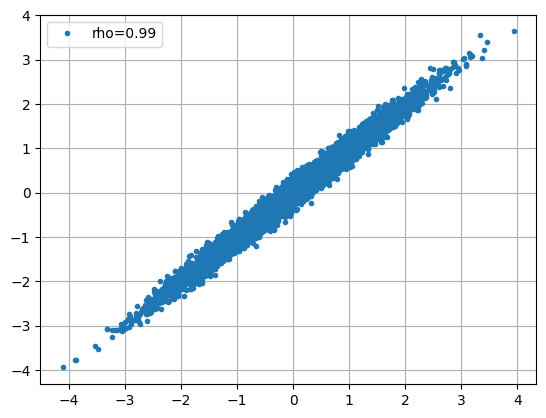

In [8]:
# correlation illustration in notebook 
mean =[0, 0]
rho = 0.99
cov = [[1, rho], [rho, 1]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T # generate correlated random points
fig = plt.figure()
plt.plot(x,y,'.',label=f"{rho=}")
plt.legend()
plt.grid();


In [9]:
np.corrcoef(x,y)

array([[1.        , 0.98979934],
       [0.98979934, 1.        ]])

#### Covariance/correlation matrix
This can be generalised to more than 2 variables as **Covariance matrix**:
 $$V_{ij} = cov( x_{(i)}, y_{(i)} )$$
 or **correlation matrix**:
  $$\rho_{ij} = \frac{cov( x_{(i)}, y_{(i)} )}{\sigma_i \sigma_j}$$
  
  These matrices are symmetric $N\times N$ matrices

---

## Important Distributions
In case of continuous distributions mean and variance are defined as integral over the probability density function (*pdf*).
 $$\text{ Mean:  } \bar{x} = \int_{-\infty}^{+\infty} x \cdot p(x) \, dx $$
 $$\text{ Variance:  }V(x) = \int_{-\infty}^{+\infty} (x - \bar{x})^2 \cdot p(x) \, dx $$
 $$\text{ Standard deviation:  } \sigma(x) = \sqrt{V(x)} $$

### Uniform distribution
The simplest distribution, all values in a specified Interval are equally likely:
$$p(x) = \frac{1}{b-a} \,\, \forall \, x \in [a,b], \, 0\,  else$$

Important for all kinds of gambling and basis for random number generators, simulations and also nice test case:

Take a uniform distribution  in $[0,1]$. It's rather straightforward to show that the mean is $0.5$ and the 
variance $\sigma^2 = 1/12$.

[//]:![Gleichverteilung](../figures/gleichv1.png)

variance = 0.082
1/12 = 0.083


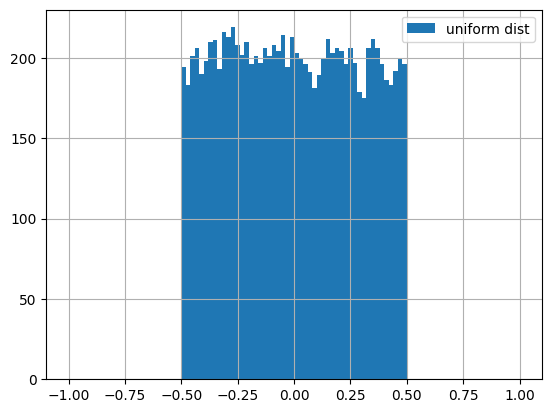

In [10]:
# uniform dist demo
data = np.random.random(10000)-0.5
plt.hist(data,bins=100,range=(-1,1), label='uniform dist');
plt.legend()
plt.grid()
print(f"variance = {np.var(data):.3f}")
print(f"1/12 = {1/12:.3f}")

---

### Binomial distribution
Describes experiments with 2 possible outcomes. A simple example is  tossing of a coin.

What is the probability to get $k$ times *head* in $n$ tries?
($p$ is the probabilty for *head* for single toss)

One special case would be to obtain *head* in the first $k$ tosses ($p^k$) and *number* in the subsequent *n-k* tosses ($(1-p)^{n-k}$), i.e. the combined probability for this to happen is 
$$p^k (1-p)^{n-k}$$

Taking into account that we are just counting the numbers of occurrences, i.e. that the order of the $k$ heads among the $n$ coin tosses doesn't matter, we find that
$${ n \choose k } = \frac{n !} { (n-k)! k!}$$
such cases exist, each with equal probability.

So in total the probability is 
$$P(k\,\times \, \text{head}) = p^k (1-p)^{n-k}{ n \choose k }$$



Mean and variance of the binomial distribution are:
$$ \bar{x} = n p , \; \; \sigma^2 = n p (1-p) $$


[//]: ![Binomialverteilung](../figures/bin1.png)


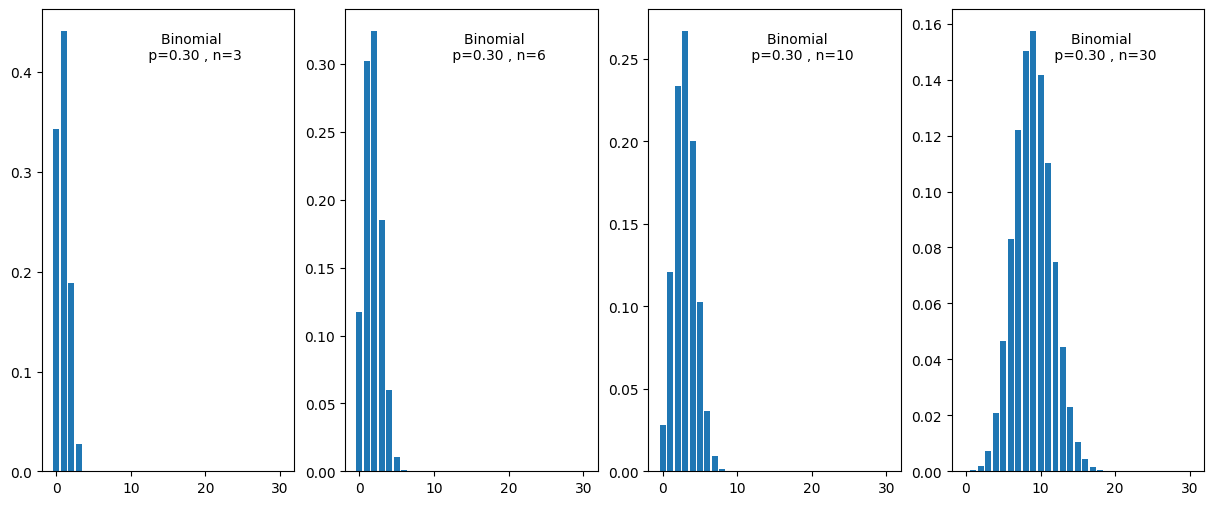

In [11]:
# Binomial Plot plot demo
import matplotlib.pyplot as plt
from scipy import stats

fig = plt.figure(1, figsize=(15,6))
nt = [ 3, 6, 10, 30]
p=0.3
for i,n in enumerate(nt):
    ax1 = fig.add_subplot(1, len(nt), 1+i)  # multiple plots: 3x1 , index 1
    x=np.arange(nt[-1]+1)
    rvp=stats.binom(n,p)
    plt.bar(x,rvp.pmf(x))
    s = f"Binomial \n {p=:.2f} , {n=}"
    ax1.text(0.6, 0.95, s, ha='center', va='top', transform = ax1.transAxes)

### Poisson distribution
The binomial distribution changes to the Poisson distribution in the limit for 
$$n \rightarrow \infty,\; p\rightarrow 0,\; np = const$$

The Poisson distribtuion is defined as 
$$P(k) = \frac{\mu^k e^{-\mu}}{k!}$$
with $\mu = n p$.

Mean and variance of the Poisson distribution are:
$$ \bar{x} = \mu , \; \; \sigma^2 = \mu $$

In practical terms the binomial distribution is already reasonably well described by the corresponding Poisson distribution for *small* $n \approx 10-20$. 

[//]: ![Poissonverteilung](../figures/bin_poiss.png)

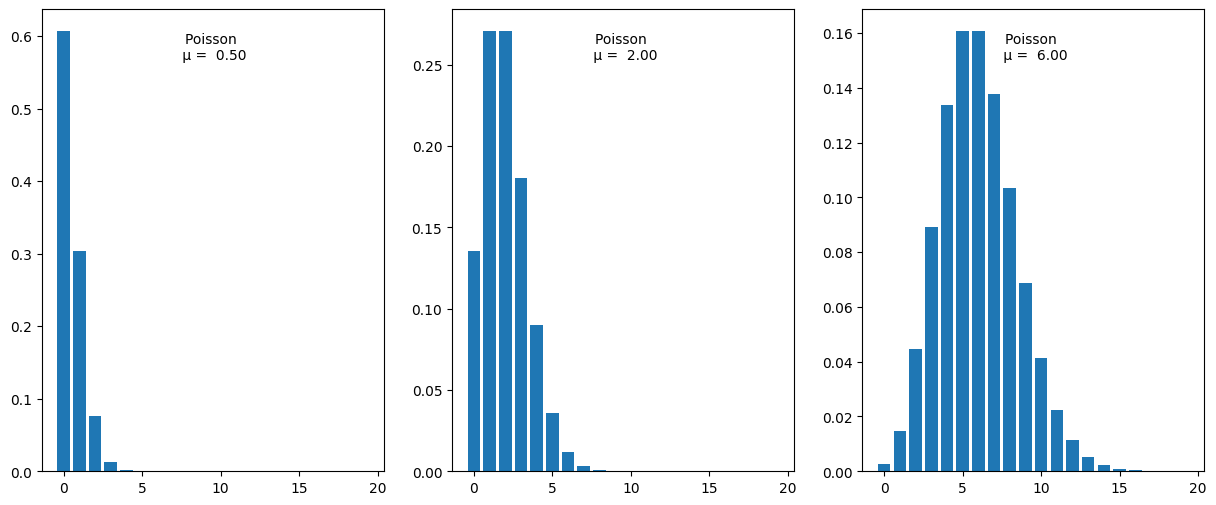

In [12]:
# Poisson plot demo
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig = plt.figure(1, figsize=(15,6))
mv = [ 0.5, 2., 6.]
for i,meanv in enumerate(mv):
    ax1 = fig.add_subplot(1, len(mv), 1+i)  # multiple plots: 3x1 , index 1
    x=np.arange(20)
    rvp=stats.poisson(meanv)
    plt.bar(x,rvp.pmf(x))
    s = f"Poisson \n μ =  {meanv:.2f}"
    ax1.text(0.5, 0.95,s, ha='center', va='top', transform = ax1.transAxes)


#### Compare Binomial and Poisson

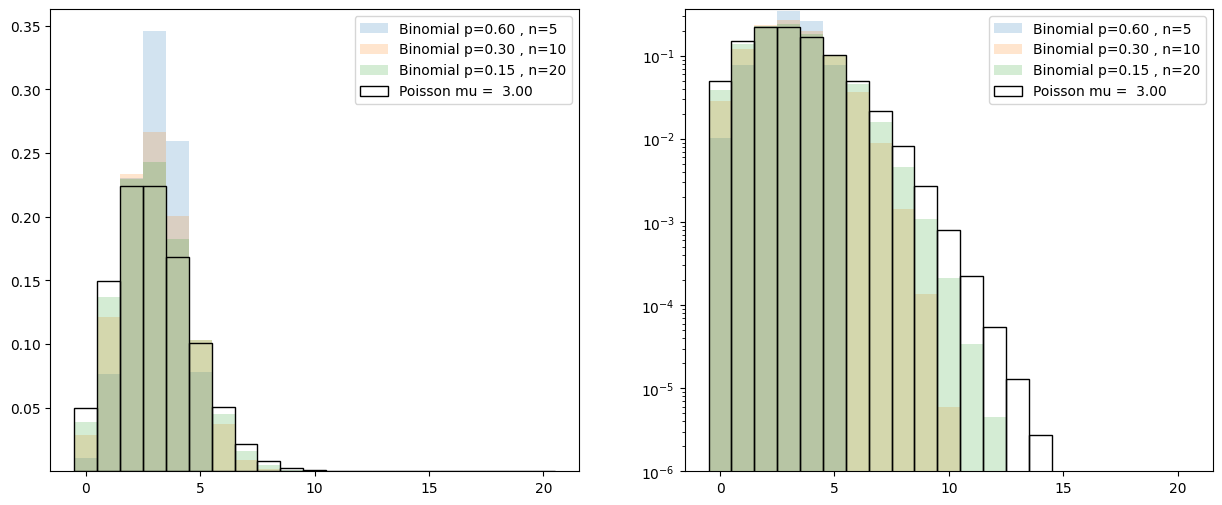

In [13]:
# Binomial vs Poisson Plot plot demo
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

fig = plt.figure(1, figsize=(15,6))
nt = [ 5, 10, 20]

scales=['linear','log']
for ipl,scale in enumerate(scales):
    ax1 = fig.add_subplot(1, 2, ipl+1)  # multiple plots: 2x1 , index 1
    for i,n in enumerate(nt):
        p = 3/n
        x=np.arange(nt[-1]+1)
        rvp=stats.binom(n,p)
        s = f"Binomial p={p:.2f} , n={n}"
        ax1.bar(x,rvp.pmf(x), width=1,alpha=0.2, label=s, fill=1, linewidth=2)

    meanv = 3
    rvp=stats.poisson(meanv)
    s = f"Poisson mu =  {meanv:.2f}"
    ax1.bar(x,rvp.pmf(x),width=1,label=s,fill=0,edgecolor='k')
    ax1.legend()
    ax1.set_ylim(ymin=1e-6)
    ax1.set_yscale(scale)



#### Poisson--Statistic showcase in the Prussian army

A classical example in statistics textbooks is the statistics of the prussian army  on deadly accidents due to horse-kicks counted by army corps and year. 

Over 20 years and  10 corps ($ = 200 $ corps-years) one counted in total 122 deadly cases. 

This yields $ \mu = 122/200 = 0.61$.


![Preussenstatistik](./figures/preussenstat.png)

### Gaussian or Normal distribution
The most important distribution in statistics
 $$G(x|\mu,\sigma) = \frac{1}{\sqrt{2\pi} \, \sigma}
e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

with mean $\mu$  and variance $\sigma^2$.

For large $\mu$  the poisson distribution converges to the Gaussian distribution, in practice already for  $\mu \approx 10$ is a reasonable approximation.

And similarly the binomial distribution converges to the Gaussian in case of large *n* and *np* .

[//]:![Gaussverteilung](../figures/bin_poiss_ga.png)

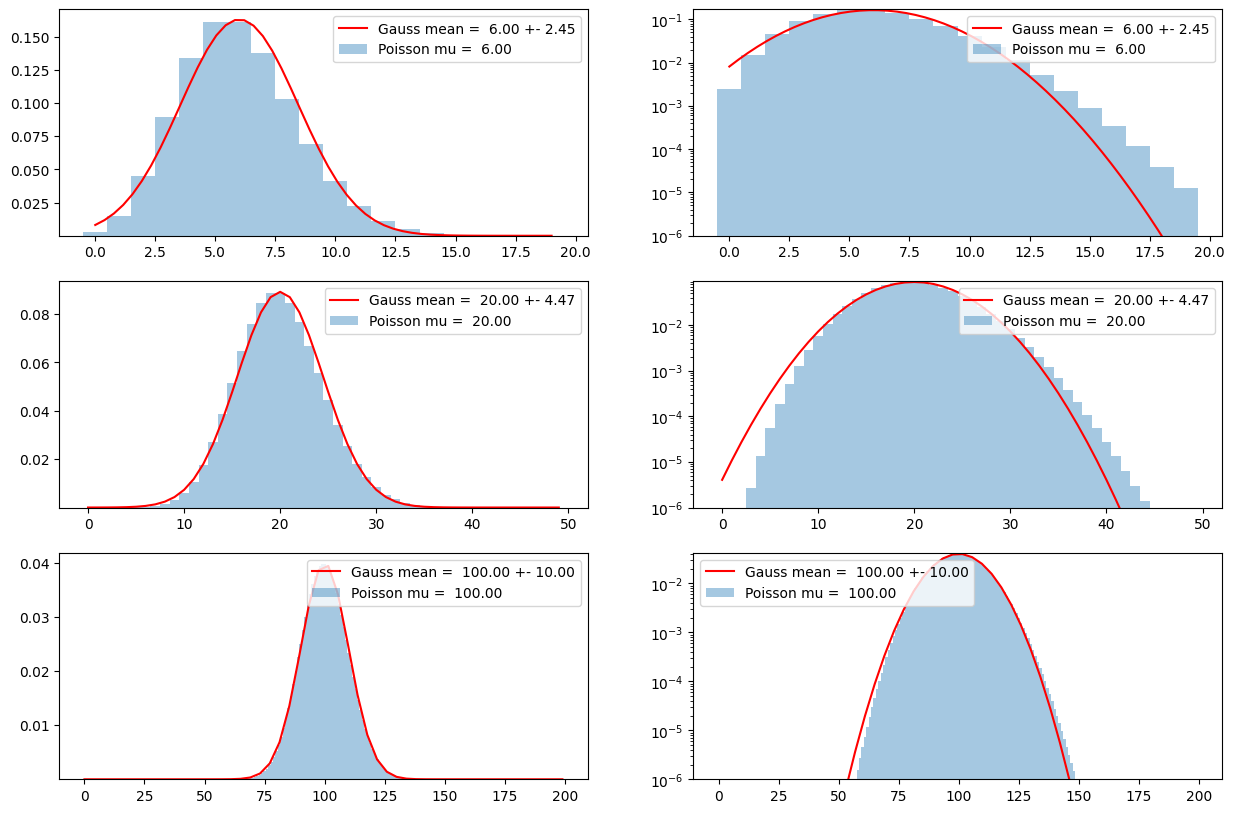

In [14]:
# Gauss vs Poisson Plot plot demo
fig = plt.figure(1, figsize=(15,10))
nt = [ 5, 10, 20]

mva=[[6,20],[20,50],[100,200]]

ipl = 0
for meanv,nx in mva:
    scales=['linear','log']
    for scale in scales:
        ipl += 1
        ax1 = fig.add_subplot(3, 2, ipl)  # multiple plots: 2x1 , index 1
        x=np.arange(nx)
        rvp=stats.poisson(meanv)
        s = f"Poisson mu =  {meanv:.2f}"
        ax1.bar(x,rvp.pmf(x),width=1,alpha=0.4,label=s)#

        s = f"Gauss mean =  {meanv:.2f} +- {meanv**0.5:.2f}"
        rvn=stats.norm(meanv,meanv**0.5)
        xv = np.linspace(x[0],x[-1],50)
        plt.plot(xv,rvn.pdf(xv),'r-',label=s);

        ax1.legend()
        ax1.set_ylim(ymin=1e-6)
        ax1.set_yscale(scale)


#### Distribution summary

![BPG](./figures/BPG.png)

### Central limit theorem
The most fundamental theorem in statistics:

For a set of independent random variables $x_i$ with means $\mu_i$ and variances $\sigma_i^2$ the quantity 
$ y = \sum x_i$ becomes a Gaussian with mean $\sum_j\mu_j$ and variance $\sum_j\sigma_j^2$ for large $n$.

The underlying distribution of the $x_i$ does not matter, e.g. if you pick random variables which are uniformly distributed or exponentially, the mean $y$ will follow approximately a normal (Gaussian) distribution.

$\rightarrow$ we will demonstrate it in the exercises


The central limit theorem is the reason for the exceptional importance of the Gaussian distribution.

---
## Exercises


#### 1) Mean and Median:
Determine mean, median and skew for 'rohr1' data set and 'sales-price'

In [15]:
# rohr data
data = np.loadtxt('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python/nb/data/rohr1.dat')
print(data.mean(),data.std(),np.median(data),skew(data))
# housing dataset
df = pd.read_csv( 'http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python/nb/data/ames_housing_no_missing.csv')
sp=df.SalePrice.to_numpy()
print(sp.mean(),sp.std(),np.median(sp),skew(sp))


-36.453228699551566 7.937052370863571 -36.29 -0.2139425965843154
180921.19589041095 79415.29188606751 163000.0 1.880940746034036


#### 2) Weather data 
The code cell below loads Zugspitze weather data, extracts field for daily rain-fall and converts it into numpy array.

* make histogram (*Hint: log-yscale might be useful:* ```plt.yscale('log')```  )
* Determine as well basic statistics: mean, std, median, 5%, 25%, 75%, 95% quantiles


<Axes: >

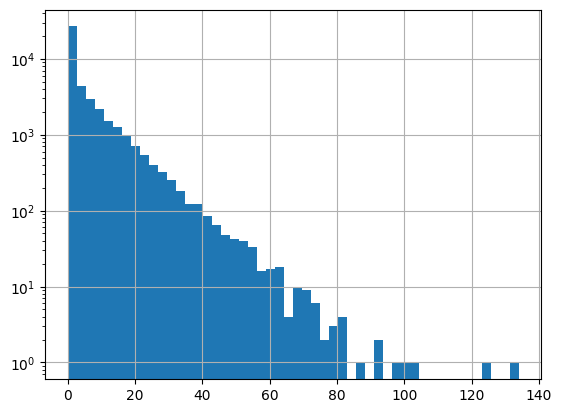

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# csv data file from zip file dowlnoad from 
# http://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html
# Messdatum als index und Interpretation als Datum (nicht nur String) 
#
df=pd.read_csv('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/sw/source/produkt_klima_tag_19000801_20181231_05792.txt',sep=';\s*',index_col='MESS_DATUM',parse_dates=['MESS_DATUM'],engine='python')
dfr=df['RSK'][df['RSK']>=0] # extract daily rain and cleanup (only entries >= 0)

dfr.hist(bins=50, log=True)

In [17]:
# 50% corresponds to median
dfr.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

count    42993.000000
mean         4.887028
std          8.619705
min          0.000000
5%           0.000000
25%          0.000000
50%          0.700000
75%          6.400000
95%         22.400000
max        133.900000
Name: RSK, dtype: float64

#### 3) scipy.stats
provides many statistical tools and functions.
* The codebox above compares Poisson and Gaussian distribution .
  * vary the mean-value and check difference between Poisson and Gaussian
* Using ```rvp=stats.poisson(0.61)``` you can generate a Poisson corresponding to the prussian army accident statistics. Using ```rvp.pmf(anum)``` you get the probability that ```anum``` accidents occur. Verify the table presented above. 


In [18]:
rvp=stats.poisson(0.61)
for i in range(7):
    print(f"{rvp.pmf(i) * 200.:f}")

108.670174
66.288806
20.218086
4.111011
0.626929
0.076485
0.007776


#### 4) Central limit theorem
The codebox sums ```nval``` uniform random numbers distributed between *[-0.5,0.5]*

Check how the shape changes when you increase ```nval``` and how it more and more approaches a Gaussian shape.

In case of ```nval == 12``` it approaches a normal distribution with mean 0 and std 1.

*(Enable commented part of code to overlay gaussian)*



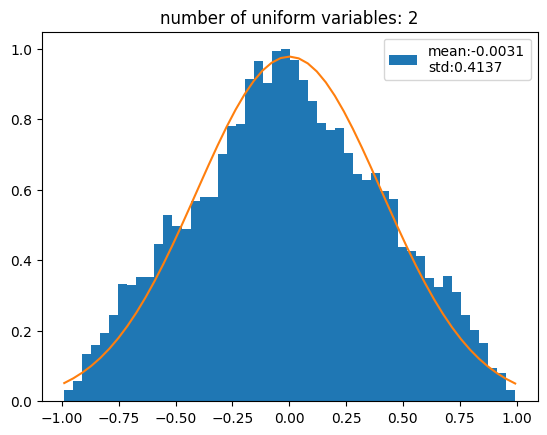

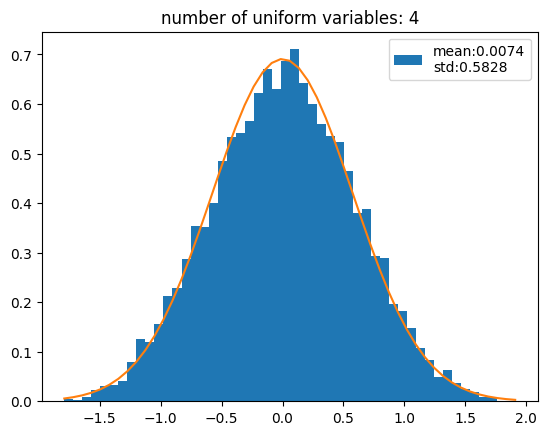

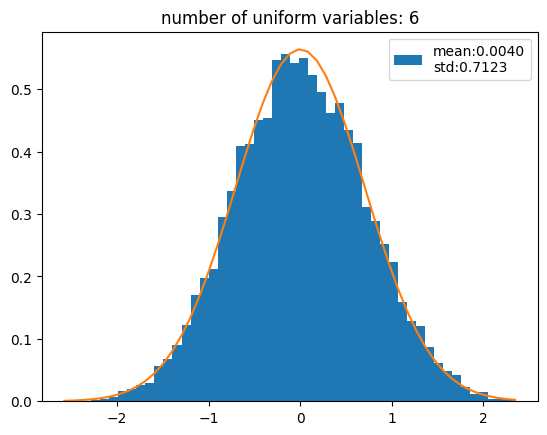

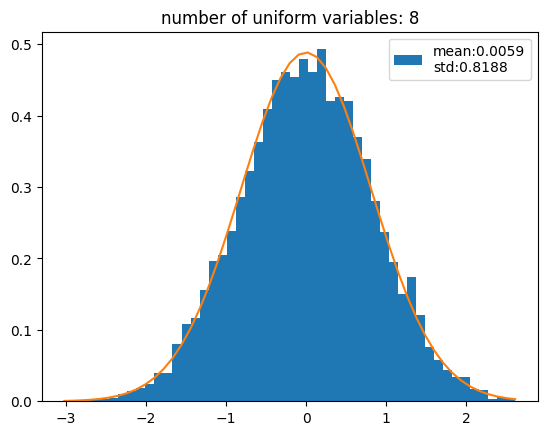

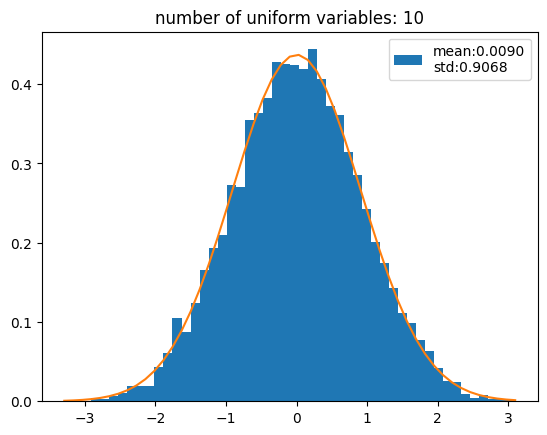

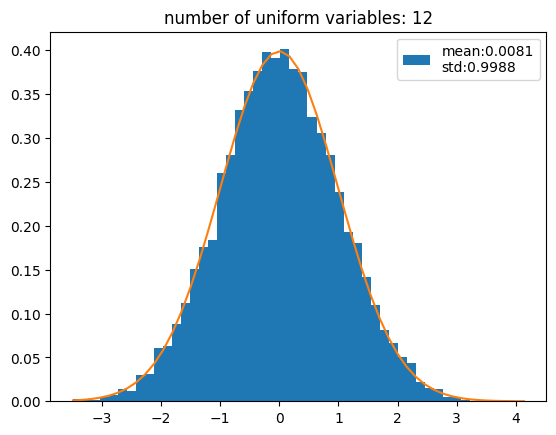

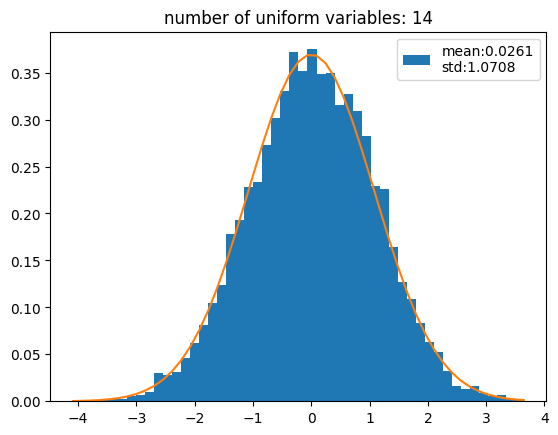

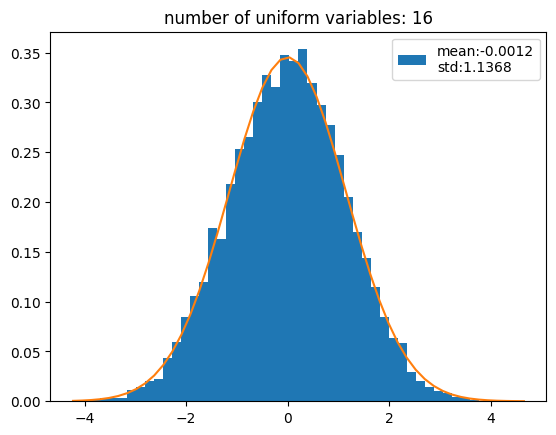

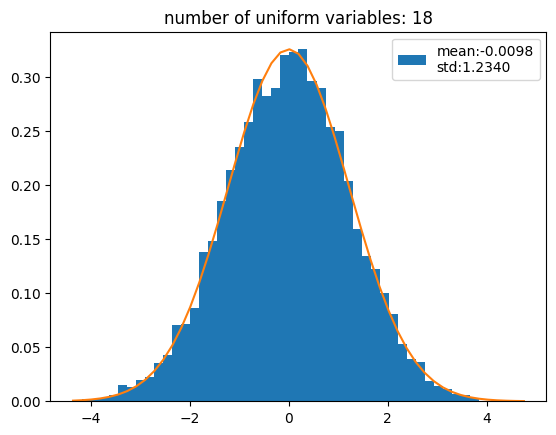

In [19]:
#mu_i = 0 --> sum(mu_i)=0
#var_i = 1/12 --> sum(var_i)=nval/12
for nval in range(2,20,2):
    a=[sum(np.random.random(nval)-0.5) for _ in range(10000)]
    a = np.array(a)
    label = f"mean:{a.mean():.4f}\nstd:{a.std():.4f}"
    biny,binx,_ = plt.hist(a,bins=50,density=1, label= label) # make histo and retrieve bin coordinates
    rvn=stats.norm(0,(nval/12)**0.5) # get normal dist
    plt.plot(binx,rvn.pdf(binx)) # plot normal dist
    plt.title("number of uniform variables: " + str(nval))
    plt.legend()
    plt.show()

gaussian fit : (-0.009754222052119853, 1.2339572368098053)


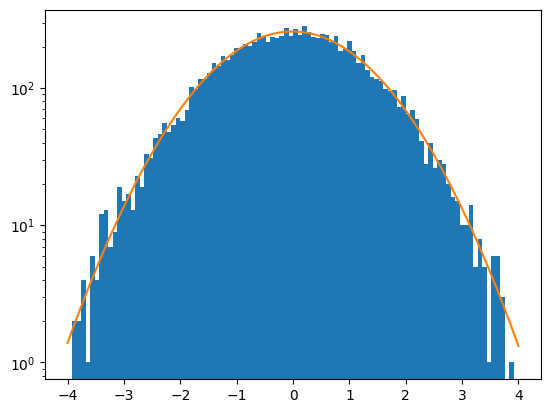

In [20]:
# fit gaussian
gp=stats.norm.fit(a)
print('gaussian fit :', gp)
rvn=stats.norm(*gp)
#p,x,*r=plt.hist(a,bins=50,density=1) 
#plt.plot(x,rvn.pdf(x));
p,x,*r=plt.hist(a,bins=100,range=(-4,4))
binwidth = (x[-1]-x[0])/(x.shape[0]-1)
plt.plot(x,np.sum(p)*binwidth*rvn.pdf(x));

plt.yscale('log')